<a href="https://colab.research.google.com/github/SHIVANSHUTRIPATHI10/COVID-19-Visualizer/blob/main/Copy_of_Untitled37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#directory of file in read mode
file_directory = r"/content/loan_approval_dataset.csv"
#reading the file
with open(file_directory,"r") as loan_data:
    df = pd.read_csv(file_directory)
    print(df)

      loan_id   no_of_dependents  ...  bank_asset_value  loan_status
0           1                  2  ...           8000000     Approved
1           2                  0  ...           3300000     Rejected
2           3                  3  ...          12800000     Rejected
3           4                  3  ...           7900000     Rejected
4           5                  5  ...           5000000     Rejected
...       ...                ...  ...               ...          ...
4264     4265                  5  ...            800000     Rejected
4265     4266                  0  ...           1900000     Approved
4266     4267                  2  ...           7300000     Rejected
4267     4268                  1  ...           5800000     Approved
4268     4269                  1  ...          12000000     Approved

[4269 rows x 13 columns]


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.size

55497

In [9]:
data_column = df.select_dtypes(include = ['int']).columns.tolist()
data_column

['loan_id',
 ' no_of_dependents',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value']

In [10]:
data_column = df.select_dtypes(include = ['object']).columns.tolist()
data_column

[' education', ' self_employed', ' loan_status']

In [11]:
df[' bank_asset_value'].unique()

array([ 8000000,  3300000, 12800000,  7900000,  5000000,  5100000,
        4300000,  6000000,   600000,  1600000,  3100000,  6400000,
        1900000,  4400000,   700000,  5900000,  6100000,  5400000,
        8500000,   300000,  2600000,  7200000,  2500000,  9700000,
        9300000,  1000000,  5800000,   900000,  1400000,  7100000,
        2900000,  9000000,  5200000,   800000, 10900000,  4900000,
        6500000,  8200000, 11700000, 10500000, 11300000,  3400000,
        6200000,  8700000,  4100000,  4800000, 11400000,  4700000,
        2800000, 11900000,  5500000,  2400000,  4200000,  7600000,
        5600000,  2000000,  1100000,  6300000, 11100000,  8600000,
        6800000,  3600000, 10200000, 12700000,  2100000,  1300000,
         400000,  7000000,  7300000,   100000,   200000, 11600000,
        1800000,  9800000,  8100000,  7500000, 13400000,  9600000,
        3800000,  8400000,  3200000,  1200000,  4600000,  8300000,
        4500000,  3500000,  2300000,  7400000,  1700000,  9500

In [12]:
df.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
#creating dummy data
df_dummy = pd.get_dummies(df)


In [15]:
df_dummy.drop('loan_id',axis = 1 , inplace=True)

In [16]:
df_dummy

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,True,False,True,False,True,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False,True,False,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,True,False,False,True
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,True,False,False,True
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,True,False,False,True,False,True
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,False,True,False,True,True,False
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,False,True,True,False,False,True
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,False,True,True,False,True,False


In [17]:
df_dummy.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education_ Graduate',
       ' education_ Not Graduate', ' self_employed_ No', ' self_employed_ Yes',
       ' loan_status_ Approved', ' loan_status_ Rejected'],
      dtype='object')

In [18]:
df_dummy = df.columns.str.strip()
df_dummy
#remove all leading and trailing space

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [19]:
df_dummy

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [20]:
#df_dummy['loan_term_log'] = np.log(df_dummy['loan_term'])
df_dummy = pd.get_dummies(df)


In [21]:
df_dummy = df.copy()


In [22]:
df_dummy.columns = df_dummy.columns.str.strip()
'loan_term' in df_dummy.columns
df_dummy.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

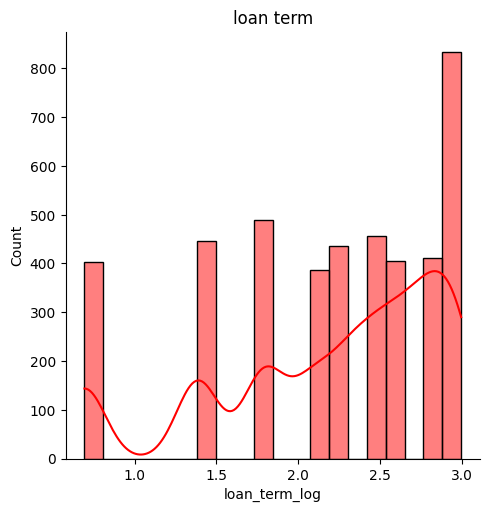

In [23]:
df['loan_term_log'] = np.log(df_dummy['loan_term'])
sns.displot(df['loan_term_log'],color = 'red',kde=True)


plt.title("loan term")
plt.show()
#

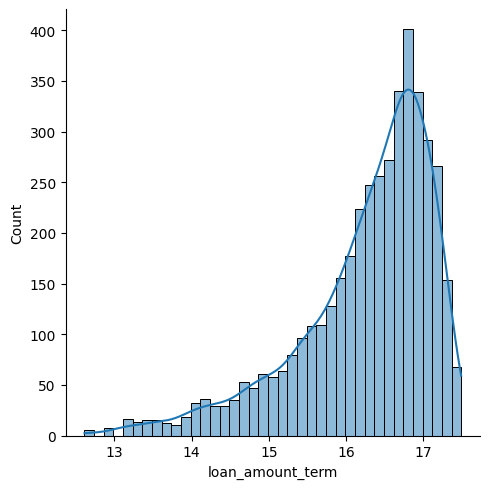

In [24]:

df_dummy["loan_amount_term"] = np.log(df_dummy["loan_amount"])
sns.displot(df_dummy["loan_amount_term"],kde=True)

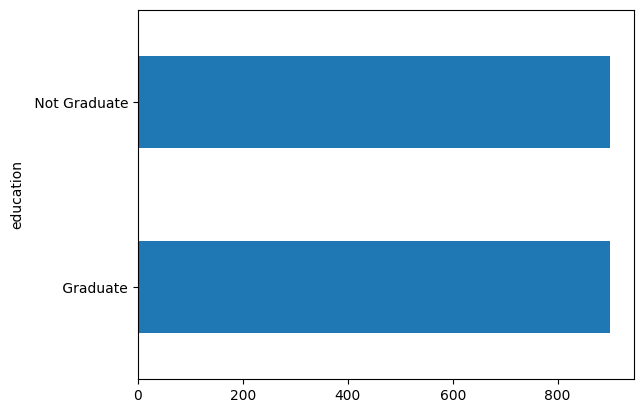

In [25]:
plot = df_dummy.groupby('education')['cibil_score'].max()
plot.plot(kind = 'barh')
plt.show()

In [26]:
#outliers
col = [" loan_term"," no_of_dependents"," loan_amount"," cibil_score"," income_annum"," bank_asset_value"," residential_assets_value"," commercial_assets_value"," loan_term"]
df_clean = df.copy()
for i in col:
  q1 = df_clean[i].quantile(0.25)
  q3 = df_clean[i].quantile(0.75)
  iqr = q3-q1
  upper_limit = q3 + 1.5*iqr
  lower_limit = q1 - 1.5*iqr
  df_clean = df_clean[(df_clean[i] <= upper_limit) & (df_clean[i] >= lower_limit)]

In [27]:
df_clean[' loan_term']

,loan_term
1,8
2,20
3,8
4,20
5,10
...,...
4264,12
4265,20
4266,18
4267,8


In [32]:
from sklearn.preprocessing import LabelEncoder
transfer = LabelEncoder()
df_dummy['education'] = transfer.fit_transform(df_dummy['education'])
df_dummy['self_employed'] = transfer.fit_transform(df_dummy['self_employed'])
df_dummy['loan_status'] = transfer.fit_transform(df_dummy['loan_status'])



In [34]:
x = df_dummy.drop('loan_status',axis = 1)
y = df_dummy['loan_status']

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [39]:
x_train


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount_term
3977,3978,5,0,1,7600000,18000000,12,452,7900000,4300000,23800000,4700000,16.705882
2425,2426,0,1,0,6000000,22900000,16,302,12200000,6500000,17700000,7100000,16.946647
1545,1546,2,1,1,8200000,27800000,16,827,11500000,8700000,26000000,10700000,17.140547
173,174,2,1,1,7400000,28200000,8,376,21900000,5000000,17400000,5200000,17.154833
3405,3406,1,0,1,3400000,7000000,4,534,3100000,1600000,13000000,4000000,15.761421
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3445,0,0,1,1300000,4700000,16,530,3200000,1000000,3800000,800000,15.363073
466,467,5,1,1,500000,1800000,18,411,1000000,500000,1300000,200000,14.403297
3092,3093,4,1,1,8600000,20600000,16,449,10800000,10600000,28700000,5400000,16.840802
3772,3773,2,1,1,7000000,21400000,12,541,3700000,1300000,19800000,9600000,16.878901


In [51]:
from sklearn.model_selection import GridSearchCV
para = {
    'criterion' : ['gini','entropy'],
    'min_samples_split' : [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
    'splitter' : ['best','random']
 }
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42,max_depth=3)
grid = GridSearchCV(tree,param_grid=para,cv=5,n_jobs=-1,verbose = 0 ,scoring = 'accuracy')
dt = grid.fit(x_train,y_train)



In [47]:
grid.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [48]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, random_state=42)

In [49]:
grid.best_score_*100

np.float64(96.37641380655226)

In [58]:
decode = dt.predict(x_test)
decoded_into_list = decode.tolist()
decoded_into_list

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,


In [62]:

decoded = transfer.inverse_transform(decoded_into_list)
print(decoded)

[' Rejected' ' Approved' ' Rejected' ... ' Approved' ' Rejected'
 ' Rejected']


In [82]:
from sklearn.linear_model import LogisticRegression
para_lor = {
    'penalty' : ['l1','l2','elasticnet','none'],
    'C' : [ 0.001, 0.01, 0.1, 1, 10,100]
}
from sklearn.model_selection import GridSearchCV
gird_lor  = GridSearchCV(LogisticRegression(max_iter=1000),param_grid=para_lor,cv=5,n_jobs=-1,verbose = 0 ,scoring = 'accuracy')
lr = gird_lor.fit(x_train,y_train)

In [84]:
gird_lor.best_params_


{'C': 0.1, 'penalty': 'l2'}

In [89]:
gird_lor.best_estimator_
gird_lor.best_score_*100

np.float64(91.69042511700468)

In [90]:
train_acc = lr.score(x_train,y_train)
test_acc = lr.score(x_test,y_test)
print(train_acc)
print(test_acc)

0.9184629803186504
0.898876404494382


In [95]:
y_predict_lor = gird_lor.predict(x_test)
y_predict_lor

array([1, 0, 1, ..., 0, 1, 1])

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=45,max_depth=3)

params_grid = {"n_estimators":[100,200,300],
               "max_features":["auto","sqrt","log2"],
               "min_samples_split":["none",2,5,10],
               "max_leaf_nodes":["none",1,5,10],
              "bootstrap":[True,False]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_model,params_grid,cv=5,scoring="accuracy",n_jobs=-1)

In [ ]:

best_rf_model=grid_search.fit(x_train,y_train)
print("best hyperparameters",grid_search.best_params_)
print("best estimator for random forest tree : ",grid_search.best_estimator_)
print("best scoring based on accuracy : ",grid_search.best_score_*100)